In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

import keras
from keras.models import load_model

from utility import clean_data, plot_images
import math

#from vis.visualization import visualize_saliency, overlay
#from keras.utils import utils
from keras import activations
from keras.models import load_model

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
classes = ['transverse','longitudinal', 'fatigue','normal']

In [4]:
def plot_confusion_matrix(y_true,y_pred,classes,
                         normalize=False,
                         titile=None,
                         cmap=plt.cm.Blues):
    title = 0
    if not title:
        if normalize:
            title = 'Normalized confusion matirx'
        else:
            title = 'Confusion matrixe, witout normalization'
        
        cm = confusion_matrix(y_true,y_pred)
        
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matirx")
        else:
            print('Cnfusion matrix, without normalization')
        
        print(cm)
        
        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title=title,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        return ax

In [5]:
train_data = clean_data('train2.csv')
train = train_data.feature.reshape((-1, 80, 80, 1))/255
train_x = train[:-400]
train_label = train_data.label[:-400]
train_onehot = train_data.onehot[:-400]
test_data = clean_data('test.csv')
test = test_data.feature.reshape((-1, 80, 80, 1))/255
test_x = test[0:]
test_label = test_data.label[0:]
test_onehot = test_data.onehot[0:]

#test_x = train[-400:]
#test_label = train_data.label[-400:]
#test_onehot = train_data.onehot[-400:]

In [7]:
cnn = tf.keras.models.load_model('cnn.h5')
dnn = tf.keras.models.load_model('DNN-64-epoch-1968_loss-0.4571_val_acc-0.8632.h5')

In [8]:
cnn.graph = tf.get_default_graph()

In [9]:
cnn_predict = cnn.predict(test_x)
cnn_cls = np.argmax(cnn_predict,axis=1)
cnn_cls+=1

In [10]:
dnn_predict = dnn.predict(test_x)
dnn_cls = np.argmax(dnn_predict,axis=1)
dnn_cls+=1

In [11]:
confusion_matrix(test_label,cnn_cls)

array([[ 80,   7,   1,   0],
       [  0, 112,   0,   0],
       [  0,   9, 103,   0],
       [  0,  86,   0,  21]], dtype=int64)

Cnfusion matrix, without normalization
[[ 80   7   1   0]
 [  0 112   0   0]
 [  0   9 103   0]
 [  0  86   0  21]]


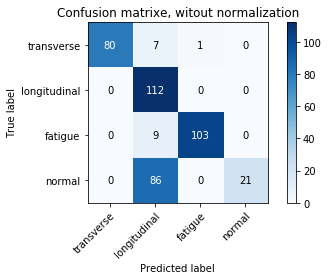

In [12]:
plot_confusion_matrix(test_label,cnn_cls,classes)

Cnfusion matrix, without normalization
[[  0  88   0   0]
 [  0 112   0   0]
 [  0 112   0   0]
 [  0 107   0   0]]


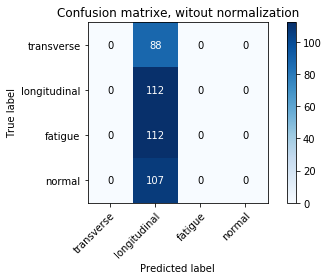

In [13]:
plot_confusion_matrix(test_label,dnn_cls,classes)